In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
path = 'storage/yelp_data/health_raw00.csv'
df = pd.read_csv(path)
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [3]:
df.head()

,business_id,name,categories,cool,date,funny,review_id,stars,text,useful,user_id,len_text
0,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2018-03-03,0,TNNkSmMfshsD3G60jTNjDA,1,Please stay away from this place if you can! I...,2,xv2V2GO5IZYvtw4oW7gQ1w,2002
1,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2015-11-29,0,v-iKdstPdCxJr8zV1ZMdrw,5,My husband has been a patient of Dr. Byrne for...,1,SjvWP7c9toeZoV_q62zhTA,877
2,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2016-06-03,0,BmNDRCV9_NzQ_KCChyfdEw,4,Dr. Byrne is a great doctor! She has great bed...,2,sZVHm1aLtvyH9trAc2_MgA,333
3,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2017-03-17,0,t_TKVMxKFYm9Hl-TIO7UUw,3,I'm raising my review as Dr Bryne's has been m...,3,8Y_irXocZdZxLs_qgzpjBw,649
4,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2016-08-31,0,NWRrpGRgWZBBj3lvCZGVKA,1,I wish I could give 0 stars. Worst office I've...,1,hVKPDGpG12z7vpScXaSakw,1408


In [4]:
data = df[['stars','text']]

In [5]:
data = data.ix[np.where((data.stars==1)|(data.stars==5))]

data.head()

,stars,text
0,1,Please stay away from this place if you can! I...
1,5,My husband has been a patient of Dr. Byrne for...
4,1,I wish I could give 0 stars. Worst office I've...
5,1,I went to the emergency room because i was hav...
6,5,Dr. Byrne is an excellent doctor with all the ...


In [6]:
data.stars.replace(1,0,inplace=True)
data.stars.replace(5,1,inplace=True)

In [7]:
data.head()

,stars,text
0,0,Please stay away from this place if you can! I...
1,1,My husband has been a patient of Dr. Byrne for...
4,0,I wish I could give 0 stars. Worst office I've...
5,0,I went to the emergency room because i was hav...
6,1,Dr. Byrne is an excellent doctor with all the ...


## split test train

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
review = data['text'].values.astype(str)
sentiments = data['stars'].values

In [10]:
# Split the data for training and for testing and shuffle it
X_train, X_test, y_train, y_test = train_test_split(review, sentiments,
test_size=0.25)

## Pre-processing

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer  # two classes of text conv to 1&0's

In [12]:
count_vect = CountVectorizer() # counts the occurance of text in doc

In [13]:
X_train_counts = count_vect.fit_transform(X_train)

In [14]:
list(count_vect.vocabulary_.items())[0:3]

[('horrible', 17582), ('customer', 9713), ('service', 31991)]

In [15]:
len(count_vect.vocabulary_)

39905

In [16]:
lab_bin = LabelBinarizer()
y_train_bin = lab_bin.fit_transform(y_train)
y_test_bin = lab_bin.fit_transform(y_test)

## Train

In [17]:
from sklearn.naive_bayes import MultinomialNB

In [18]:
clf = MultinomialNB().fit(X_train_counts, y_train_bin.ravel())

In [19]:
len(clf.coef_[0])

39905

In [20]:
import collections

In [21]:
importanceCount = collections.Counter()

In [22]:
for word, imp in zip(count_vect.vocabulary_.keys(), clf.coef_[0]):
    importanceCount[word] = imp

In [23]:
importanceCount.most_common()[-10:]

[('infrared', -14.42076815784477),
 ('thusly', -14.42076815784477),
 ('ingenuity', -14.42076815784477),
 ('hamilia', -14.42076815784477),
 ('rabe', -14.42076815784477),
 ('ferry', -14.42076815784477),
 ('amon', -14.42076815784477),
 ('grecia', -14.42076815784477),
 ('wldnt', -14.42076815784477),
 ('540', -14.42076815784477)]

In [24]:
importanceCount.most_common()[0:10]

[('pellets', -3.1152728487692602),
 ('normalize', -3.3285077369325755),
 ('ccsd', -3.4649740695170443),
 ('pedestal', -3.9655241929406877),
 ('ostensibly', -4.068628301973943),
 ('unrestricted', -4.232929072953318),
 ('pomona', -4.282564277641818),
 ('lofiann', -4.371450157097103),
 ('michieli', -4.401945006628738),
 ('chaired', -4.421561418250098)]

## Now test

In [25]:
X_test_counts = count_vect.transform(X_test)

In [26]:
pred = clf.predict(X_test_counts)

In [27]:
from sklearn.metrics import average_precision_score

In [28]:
print('Preicision = {:f}'.format(average_precision_score(y_test_bin,pred)))

Preicision = 0.948598


## sanity check

In [29]:
clf.predict(count_vect.transform(['this nurse couldnt even measure my temperature corectly']))

array([0])

## prob of the prediction

In [30]:
clf.predict_proba(count_vect.transform(['this nurse couldnt even measure my temperature corectly']))

array([[0.98163083, 0.01836917]])

In [31]:
rev0 = '''
If you plan on working here for benefits, run away, especially if you want to have a baby here. You would think being an employee would offer some perks, but it does not.  They changed their insurance plans at the end of the year, so people who planned a pregnancy in 2017 were screwed if their babies were born in 2018. $1000's in in hospital bills (and this is for an uncomplicated delivery). 

If Dinette is your nurse, ask for another one. My experience was terrible with her. I called to file a complaint about her and was told they would look into it. No one has ever contacted me!

Watch out for your itemized billing statements. They charge you for the hospital, the nurses, the anesthesiologist, OB and labs all separately. This is why our healthcare is going down the hole. There is no possible way to tell if you are being charged properly. Also, they charge you to admit you.
'''

rev1 = '''
First off this is a review of the cafe.  This is by far the best hospital food I've had.  Their cafe honestly better than Luby's cafe food.  They offer a wide variety of selections from fresh to order sandwiches, a BBQ area, Asian Stir frys, Homestyle cooking meals, Tex-Mex stand, Pasta Bar, Pizza, Sushi, fresh made salads and soup, and a made to order grill.  But what makes this a 5 star is their desserts.  Their desserts are amazing!  The presentation looks like something out of la madeline.  I am willing to make the walk from work to this cafe.
'''

rev00 = '''
Attn Small Business Owners and Independence Insurance Policy Holders. Beginning in  March 2018, received a call from Houston Methodist Hospital concerning a bill for 289.20.  On March 16, 2018, paid the amount over the phone with a Customer Service representative receiving a confirmation from my bank stating the bill was paid with an authorization code time 11:53 a.m. As of May 3rd, 2018, my patient portal still reflecting a payment due on the same bill listed above. Contacted Houston Methodist Hospital again for the same bill their representative called me back in March 2018 and payment was not credited to my bill. 

I receive a call from the same customer service department dated 24th of May, 2108, this representative from Houston Methodist department stating my insurance payment has been posted from the EOB(Explanation of Benefits) for the outstanding bill of 30, 033.20 and an outstanding credit (REFUND) of $594.09 will be processed. The female representative will process the refund amount stated above.  She left the contact number 832-667-6291 (does not work) concerning her message. 

Now returning to my mailbox on June 7, 2018 inside I found a bill from Houston Methodist Hospital for the amount listed above for 30,033.20. OK- DUMB ASS - I am totally sick of you and will use all multimedia to post my complaint plus letters to the Board Members and Chief Executive Officer. I have kept a copy of this post for my file !
'''
rev11 = '''
This review is solely based on being a visitor and not a patient.

Houston Methodist is a top notch hospital in terms of patient care and customer service to visitors. From the cafeteria staff to nurses, from the security to the surgeons, every staff member greet you with a smile and goes above and beyond to serve you. 

Here are few compliments about this hospital:

1. Food- The cafeteria food is amazing and reasonably price. From pasta, pizza, sushi, fried fish sandwiches and more, they have it all. Did I mentioned that it was reasonably priced? I love that the hospital is not trying to overcharge you when you are frequently visiting here. 

2. Staff- They are very friendly and sensitive to your reason of visiting the facility. The nurse staff was  personable to family and loved one needing the care. We felt comforted knowing that our loved one was in good hands.

ONLY ISSUE is parking. There should be a special discount or program for visitors who frequently visit for weeks or months. Charging $13 a day can be very taxing on a family. Especially if they have more than one family member driving to the facility.
'''

rev000 = '''
The medical care we received at Methodist was very good.

Billing and customer service is beyond terrible! If I lost a leg across the street from Methodist...I would find a way to drive across town to a different hospital.

My son got stitches from a nurse. The procedure never involved a doctor or any medicine, and probably took an hour from start to finish. I received a bill weeks later for nearly $2500! For stitches! 

I also received a bill from the physician's office for the same work (but only for about $250, which I happily paid). Mind you, the physician's office is billing for the people that actually did the work! Methodist is supposed to only be charging for use of the facility, equipment, and medications.

Comparing the two bills, it became apparent that not only was Methodist charging me for work done by the physician's office (double charging), they were charging far more than the physicians were. Further, nearly all of the charges were incorrect (they listed the wrong trauma level, wrong part of the body!, and wrong length of the laceration). 

When I called billing to correct these issues, they were not able to answer anything. You may as well be talking to burger king workers about your medical billing. They insist that everything is correct, while not being able to explain what any of it means, or answer your questions. Finally they transfer you to their supervisor, which is always voicemail, and then they never call you back. I have made about 10 calls to their office now, and six months later, the issue is still unresolved.

The physician's office even told me that Methodist is their worst client, and never handles their billing correctly.
'''

In [32]:
clf.predict(count_vect.transform([rev000]))

array([0])

In [33]:
clf.predict_proba(count_vect.transform([rev000]))

array([[1.00000000e+00, 1.70850365e-31]])

In [34]:
df_one = df.stars == 1
df_five = df.stars == 5

In [35]:
one = df[df_one]
five = df[df_five]

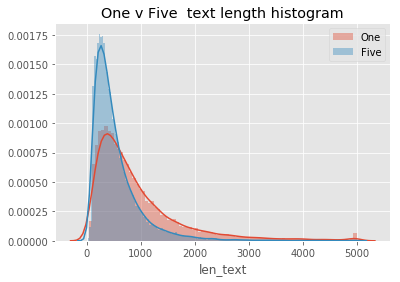

In [36]:

sns.distplot(one.len_text,bins='auto',label='One')
sns.distplot(five.len_text,bins='auto',label='Five')
plt.legend()
plt.title('One v Five  text length histogram')
plt.show()

In [37]:
df

,business_id,name,categories,cool,date,funny,review_id,stars,text,useful,user_id,len_text
0,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2018-03-03,0,TNNkSmMfshsD3G60jTNjDA,1,Please stay away from this place if you can! I...,2,xv2V2GO5IZYvtw4oW7gQ1w,2002
1,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2015-11-29,0,v-iKdstPdCxJr8zV1ZMdrw,5,My husband has been a patient of Dr. Byrne for...,1,SjvWP7c9toeZoV_q62zhTA,877
2,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2016-06-03,0,BmNDRCV9_NzQ_KCChyfdEw,4,Dr. Byrne is a great doctor! She has great bed...,2,sZVHm1aLtvyH9trAc2_MgA,333
3,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2017-03-17,0,t_TKVMxKFYm9Hl-TIO7UUw,3,I'm raising my review as Dr Bryne's has been m...,3,8Y_irXocZdZxLs_qgzpjBw,649
4,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2016-08-31,0,NWRrpGRgWZBBj3lvCZGVKA,1,I wish I could give 0 stars. Worst office I've...,1,hVKPDGpG12z7vpScXaSakw,1408
5,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2018-05-06,0,jX47gPdL1ta_OTt5HgDSGQ,1,I went to the emergency room because i was hav...,1,KZ2_AsAYr3iSsUfK06W-aw,2985
6,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2017-10-16,0,LSCLa-SIOgaOxP4r3VjX-A,5,Dr. Byrne is an excellent doctor with all the ...,3,OrsSCQlWIOiitqDSzwn4bQ,1201
7,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2017-08-10,0,O78Aq4xO8WsdISZMLJWOtQ,1,Worst place ever. Dr Bryne had to reschedule m...,0,FvMiqD6kciJq6um3yFlkZQ,886
8,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2017-01-23,0,B3ie19nC7VGj3GL6-aO3nA,1,Update to my last review. My situation got ev...,2,L3nYsxpkshtU_xdNh3mM1Q,479
9,STcSSjPOZ0FWtjvjqw99Dg,Black Mountain Orthopaedics,"doctors, orthopedists, health & medical",1,2012-03-06,0,Ap0anyQxUx8OijF_CjRJyA,5,I'm going to follow Jacie's example and give y...,1,MAzrWB0y2O0lfSBalPu0Iw,2008
